In [68]:
import os
import pandas as pd

def read_text_file(base_folder, timestamp, file_name):
    """
    Reads a text file from a specified timestamp folder using pandas, 
    handling mixed delimiters (commas and whitespace) properly, 
    and dynamically naming columns.
    """
    folder_path = os.path.join(base_folder, timestamp)
    file_path = os.path.join(folder_path, file_name)
    
    if not os.path.exists(file_path):
        print(f"Error: The file '{file_name}' does not exist in the folder '{folder_path}'.")
        return None

    # Read the file line by line, first splitting on commas, then further splitting on whitespace
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Split on commas first
            parts = line.strip().split(',')
            # Further split the third part onwards on whitespace
            processed_parts = parts[:2] + parts[2].split()
            data.append(processed_parts)

    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Generate dynamic column names based on the actual number of columns
    num_columns = df.shape[1]
    
    # Define the first two column names
    column_names = ["Span", "Beam"]
    
    # If there's at least 3 columns, assign "Co-ordinate" to the third column
    if num_columns > 2:
        column_names.append("Co-ordinate")
    
    # Add dynamically numbered columns for remaining data
    remaining_columns = [f"Column_{i+1}" for i in range(num_columns - len(column_names))]
    
    # Combine into the final column names
    df.columns = column_names + remaining_columns

    return df

# Example usage
base_folder = '../0_GAB'  
timestamp = '20141129040000'  # Change this to the desired timestamp folder
file = 'EI_N-B_Far_Comp.txt'  # Change this to your file name
df = read_text_file(base_folder, timestamp, file)

print(df)



    Span Beam Co-ordinate  Column_1  Column_2  Column_3  Column_4   Column_5  \
0    N13    B       12.64  16.87988  17.26174   10.8382  10.81447  -8919.184   
1    N13    B       12.54  16.87988  17.38764   10.8382   10.8127  -8919.184   
2    N13    B       12.44  16.87988  17.38474   10.8382   10.8113  -8919.184   
3    N13    B       12.34  16.87792  17.23387  10.83836  10.80999  -8919.283   
4    N13    B       12.24  16.86536  17.13409  10.83844  10.80853  -8919.184   
..   ...  ...         ...       ...       ...       ...       ...        ...   
626  N10    B        1.32  16.98317  3.781734  10.84052  10.80307  -8915.084   
627  N10    B        1.21  16.98317  3.761827  10.84052  10.80258  -8915.084   
628  N10    B        1.11  16.98317   3.73274  10.84052  10.80207  -8915.084   
629  N10    B        1.01  16.98317  3.692301  10.84052  10.80158  -8915.084   
630  N10    B        0.91  16.98317  3.661915  10.84052  10.80116  -8915.084   

     Column_6  Column_7  Column_8 Colum

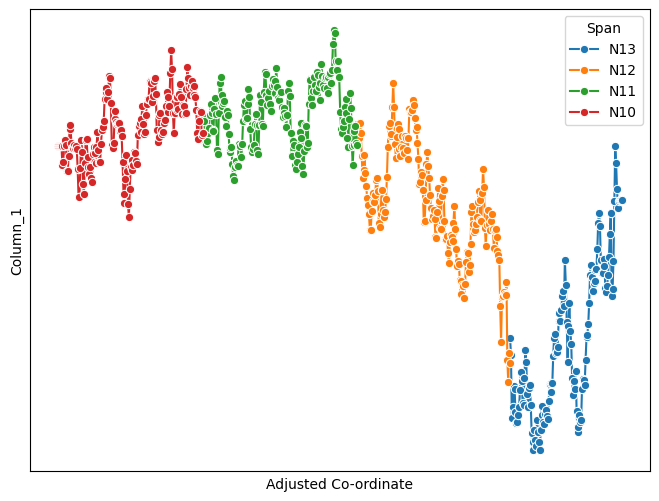

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure "Co-ordinate" is numeric
df["Co-ordinate"] = pd.to_numeric(df["Co-ordinate"], errors="coerce")  # Convert, setting errors to NaN if needed
df["Column_1"] = pd.to_numeric(df["Column_1"], errors="coerce")  # Convert Y-axis column to numeric too

# Define which columns to use for plotting
x_col = "Co-ordinate"  # X-axis (keeps Co-ordinate fixed)
y_col = "Column_1"   # Y-axis (change this to plot a different column)

# Ensure spans are processed in the correct order
df["Adjusted_Coordinate"] = df[x_col]  # Start with original values

# Extract numeric part from Span and sort correctly
df["Span_Number"] = df["Span"].str.extract(r'(\d+)').astype(float)
span_order = df.groupby("Span")["Span_Number"].first().sort_values().index.tolist()

# Compute offsets dynamically
offset = 0

for span in span_order:
    span_mask = df["Span"] == span
    if span_mask.any():
        min_coord = df.loc[span_mask, x_col].min()  # Now guaranteed to be numeric
        df.loc[span_mask, "Adjusted_Coordinate"] += offset - min_coord
        offset = df.loc[span_mask, "Adjusted_Coordinate"].max()  # Update for next span

# Plot using Seaborn with hue to differentiate spans
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Adjusted_Coordinate", y=y_col, hue="Span", marker="o", linestyle="-")

plt.xlabel("Adjusted Co-ordinate")  # X-axis label stays fixed
plt.ylabel(y_col)  # Y-axis label updates dynamically
plt.xticks([])  # Remove x-ticks for a cleaner look
plt.yticks([])  # Remove y-ticks
plt.show()




In [ ]:
import matplotlib.pyplot as plt

if df is not None:
    # Filter only rows where Column_1 is 'N13'
    df_filtered = df[df["Span"] == "N13"]

    # Convert Column_3 & Column_4 to numeric
    df_filtered["Co-ordinate"] = pd.to_numeric(df_filtered["Co-ordinate"], errors="coerce")
    df_filtered["StrainAmp1"] = pd.to_numeric(df_filtered["StrainAmp1"], errors="coerce")

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(df_filtered["Co-ordinate"], df_filtered["StrainAmp1"], marker="o", linestyle="-", label="N13 Data")

    plt.xlabel("Co-ordinate")
    plt.ylabel("TempAmp1StrainAmp1")
    plt.title("Plot of Co-ordinate vs TempAmp1StrainAmp1 for N13")
    plt.legend()
    plt.grid(True)

    plt.show()